# Cryptocurrency Price Prediction with AUTO TS

>Development of a model to predict Bitcoin prices with machine learning using AUTO TS. The data was splited into train and test (considering 90:10 ratio) and evaluated by MAPE (Mean Absolute Percentage Error). To simplify the model, was considered historical prices from YFinance since 2021, January.
Source: https://finance.yahoo.com/

**Disclaimer:**
This Cryptocurrency Prediction Model can only work in situations where prices changes due to historical variation. Any other price variation reasons, such as government regulations, changes in financial policies, etc do not impact the presented predictions.

In [15]:
# Import modules:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import mplfinance as mpf
from auto_ts import auto_timeseries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Colect and process Bitcoin prices data from yfinance API:

In [2]:
# Getting data from file cryptocurrency_get_data.py:
exec(open('cryptocurrency_get_data.py').read())

There are 0 missing values on Data frame
Data frame shape: (834, 6)
Data frame extraction from 2021-01-01 to 2023-04-14
cryptocurrency_get_data successfully run


#### Candlestick chart to visualize Bitcoin Prices and the Simple Moving Average for the last 90 days:

In [12]:
# Setting date for 90 past days:
today = date.today().isoformat()
period = (date.today()-timedelta(days=90)).isoformat()

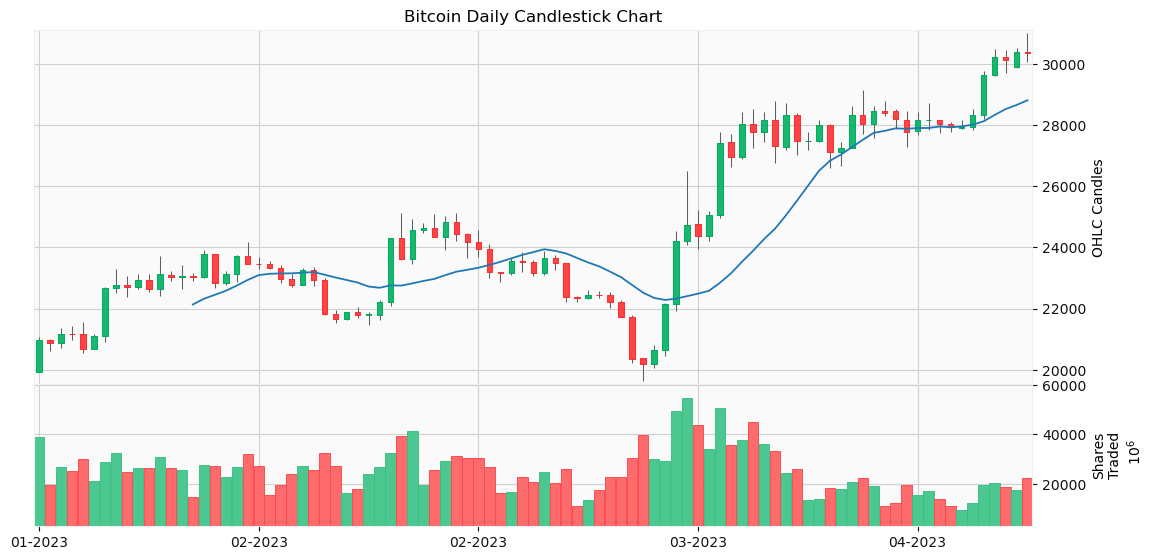

In [14]:
# Selecting and preparing data:
df_cdstk = df_btc.set_index('date')
df_cdstk = df_cdstk.loc[period:today,:]

# Creating Candlestick chart:
mpf.plot(df_cdstk, type='candle', mav=(15), volume=True, style='yahoo',
         figratio=(20,10),datetime_format='%m-%Y',
         xrotation=0,tight_layout=True,axtitle='Bitcoin Daily Candlestick Chart',
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded')

The blue line represents Simple Moving Average from last 15 days.

### Splitting train and test data:

In [18]:
# Selecting data from the last 90 days:
df = df_btc.loc[df_btc.date >= period].reset_index(drop=True)

In [22]:
# Using ratio 90:10 to split test and train data. It means 90% of the data for training and 10% for test:
count_lines = len(df.index)
limit = int(count_lines*0.9)

train = df.iloc[:limit]
test = df.iloc[limit-1:]

print("Train length: {}".format(train.shape[0]))
print("Test length: {}".format(test.shape[0]))

Train length: 81
Test length: 11


####  Line chart to visualize train-test dataset:

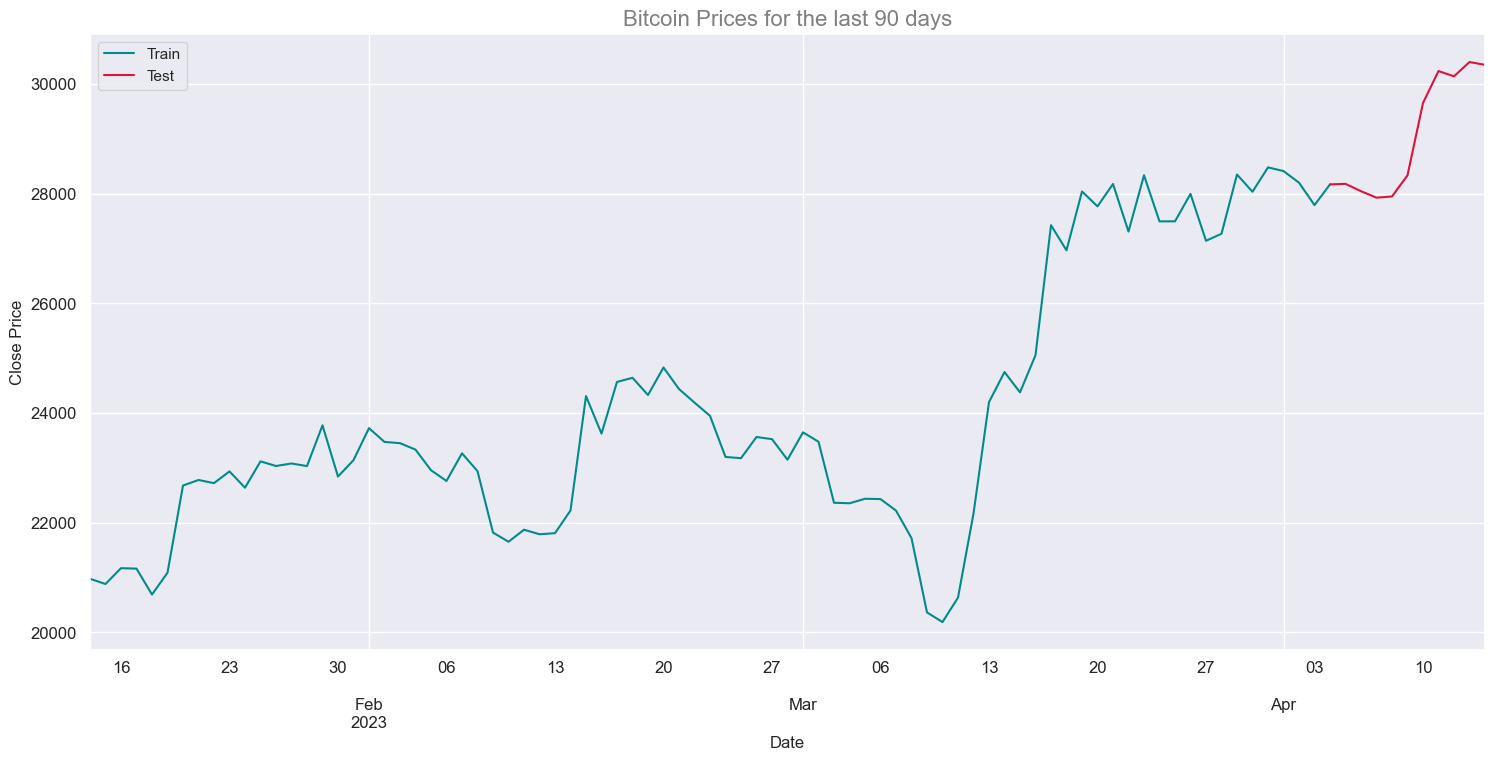

In [25]:
# Preparing data:
train_chart = train.set_index('date')
test_chart = test.set_index('date')

# Building train-test chart:
train_chart.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_chart.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson')
plt.legend()
plt.title("Bitcoin Prices for the last 90 days", fontsize=16, color='Grey')
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.show()

### Model Building using AUTO TS:

In [26]:
# Setting model parameters: 
model = auto_timeseries(forecast_period=test.shape[0], score_type='rmse', time_interval='D', model_type='best')

Start of Fit.....
    Target variable given as = close
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['close']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (81, 5)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


18:46:36 - cmdstanpy - INFO - Chain [1] start processing


kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 48 Test Shape: 11


18:46:37 - cmdstanpy - INFO - Chain [1] done processing
18:46:37 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 2,403.83
    Std Deviation of actuals = 1,102.51
    Normalized RMSE (as pct of std dev) = 218%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 59 Test Shape: 11


18:46:37 - cmdstanpy - INFO - Chain [1] done processing
18:46:38 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 5,837.93
    Std Deviation of actuals = 1,379.97
    Normalized RMSE (as pct of std dev) = 423%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 70 Test Shape: 11


18:46:38 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 2,344.95
    Std Deviation of actuals = 439.21
    Normalized RMSE (as pct of std dev) = 534%
Cross Validation window: 3 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 3289.08
    MSE (Mean Squared Error = 15119551.19
    MAPE (Mean Absolute Percent Error) = 13%
    RMSE (Root Mean Squared Error) = 3888.3867
    Normalized RMSE (MinMax) = 47%
    Normalized RMSE (as Std Dev of Actuals)= 135%
Time Taken = 2 seconds


18:46:38 - cmdstanpy - INFO - Chain [1] start processing
18:46:38 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=732.135, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=733.569, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=733.570, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=730.557, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=735.559, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.198 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1353.410, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=944.610, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=946.493, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Ti

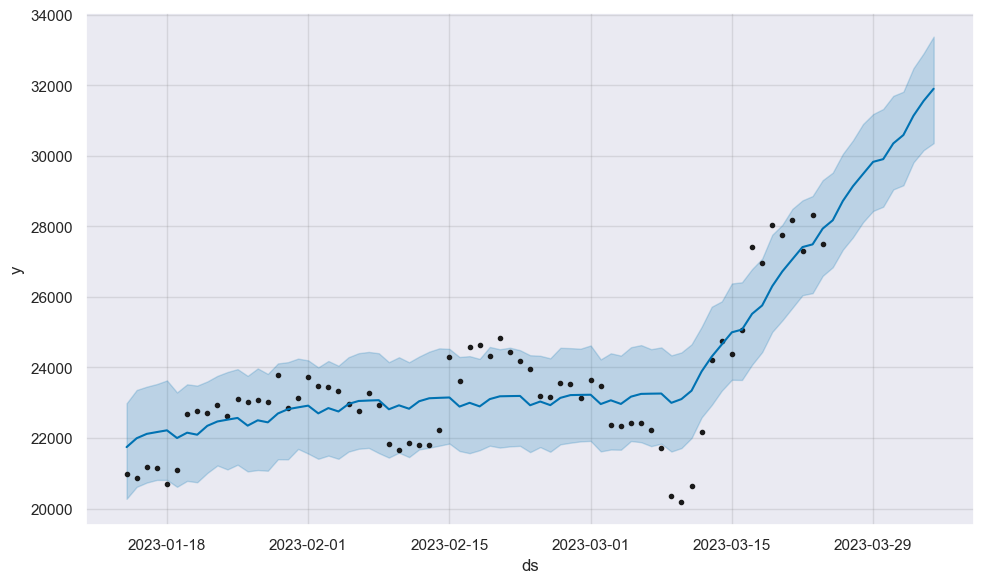

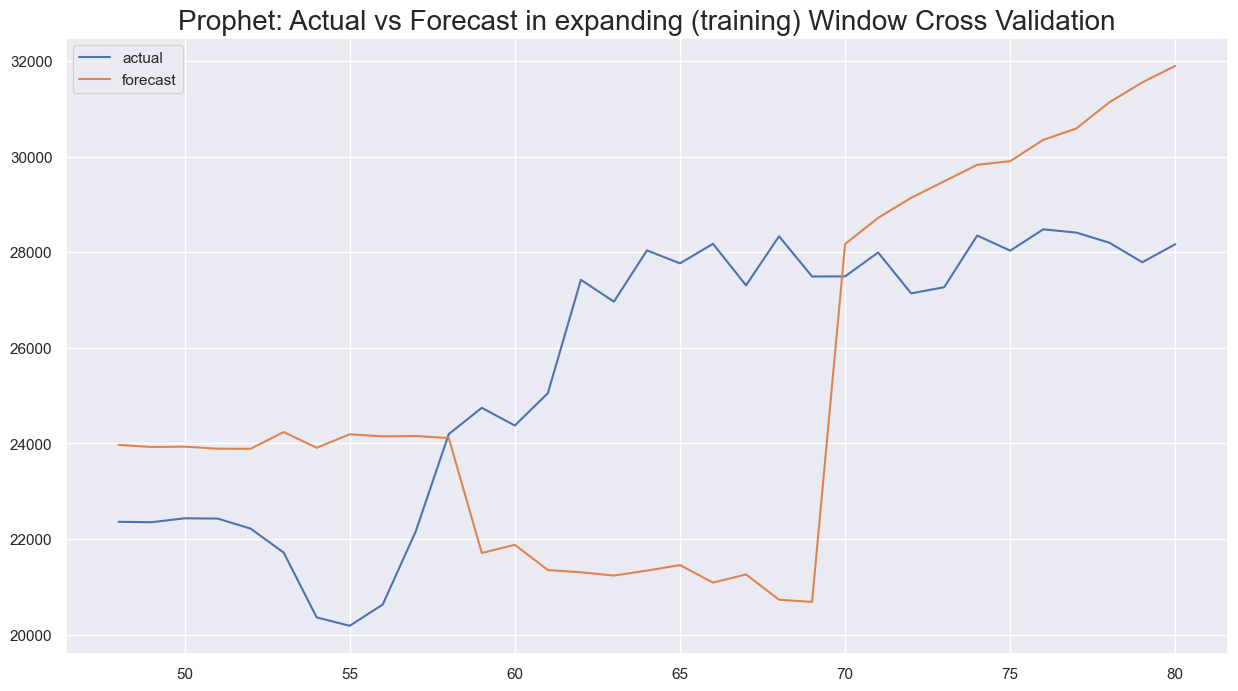

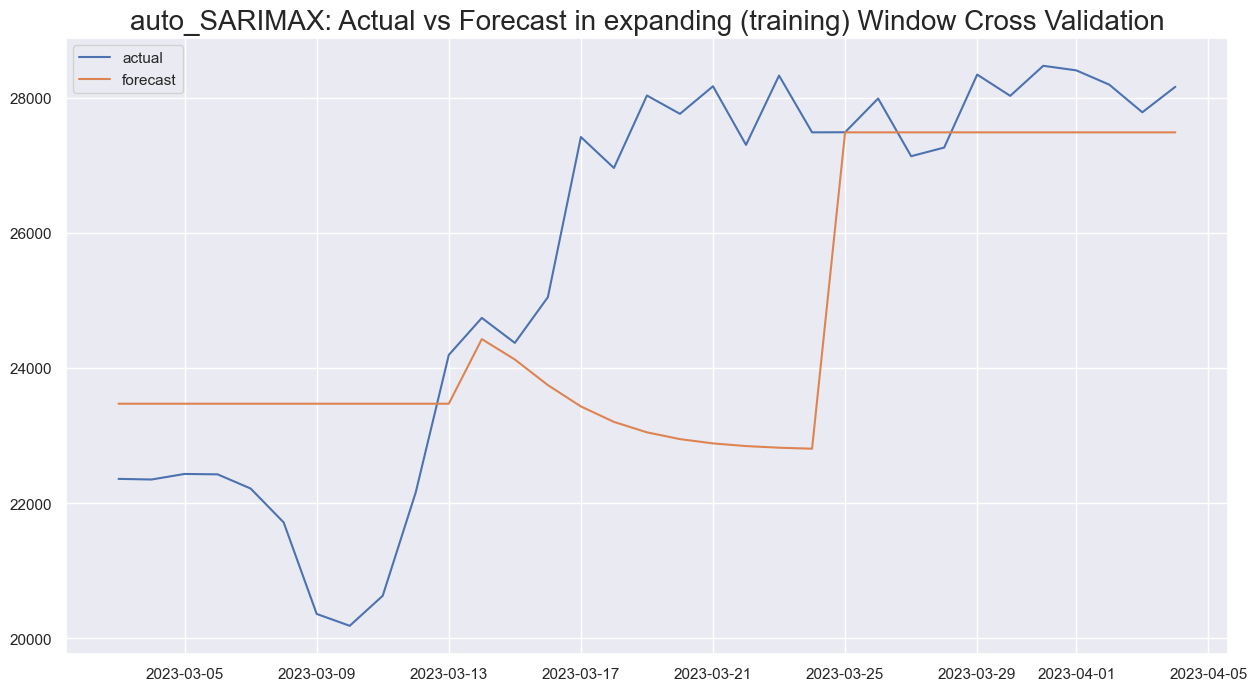

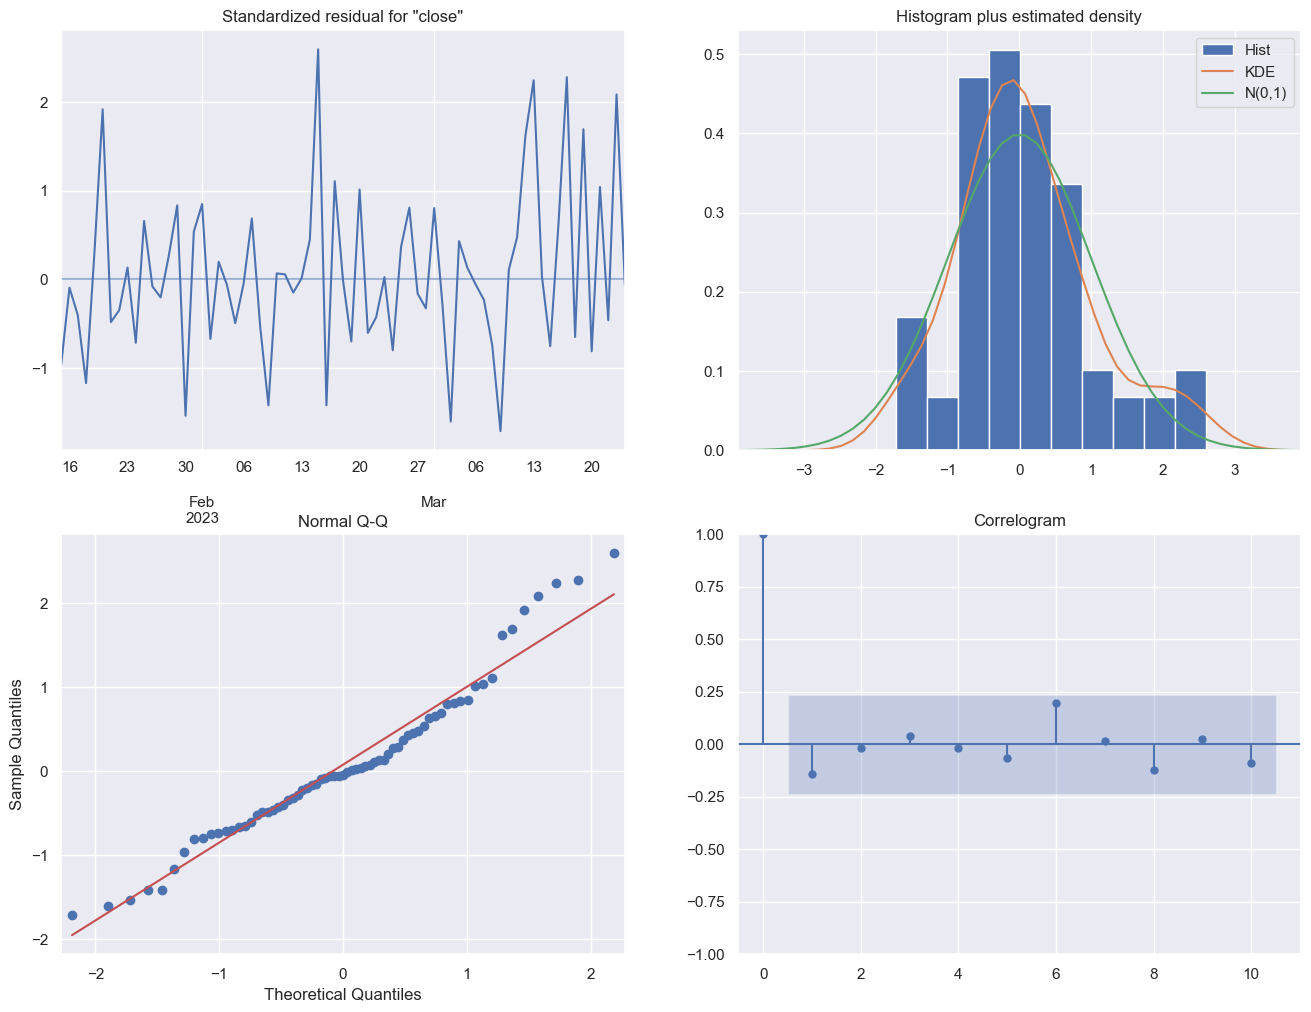

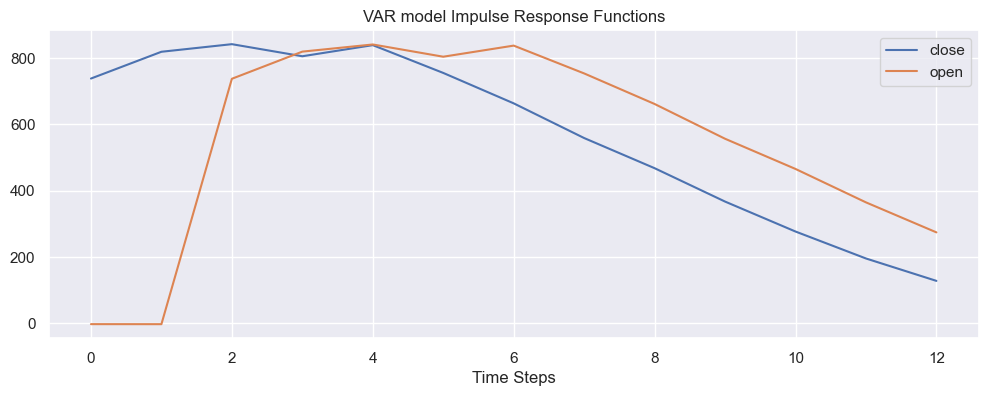

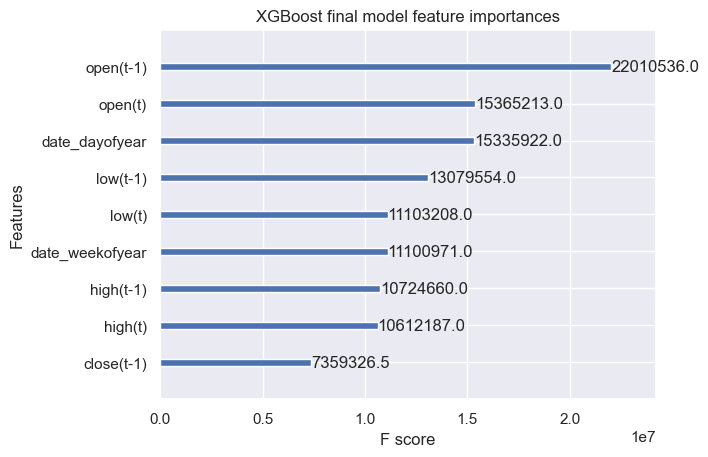

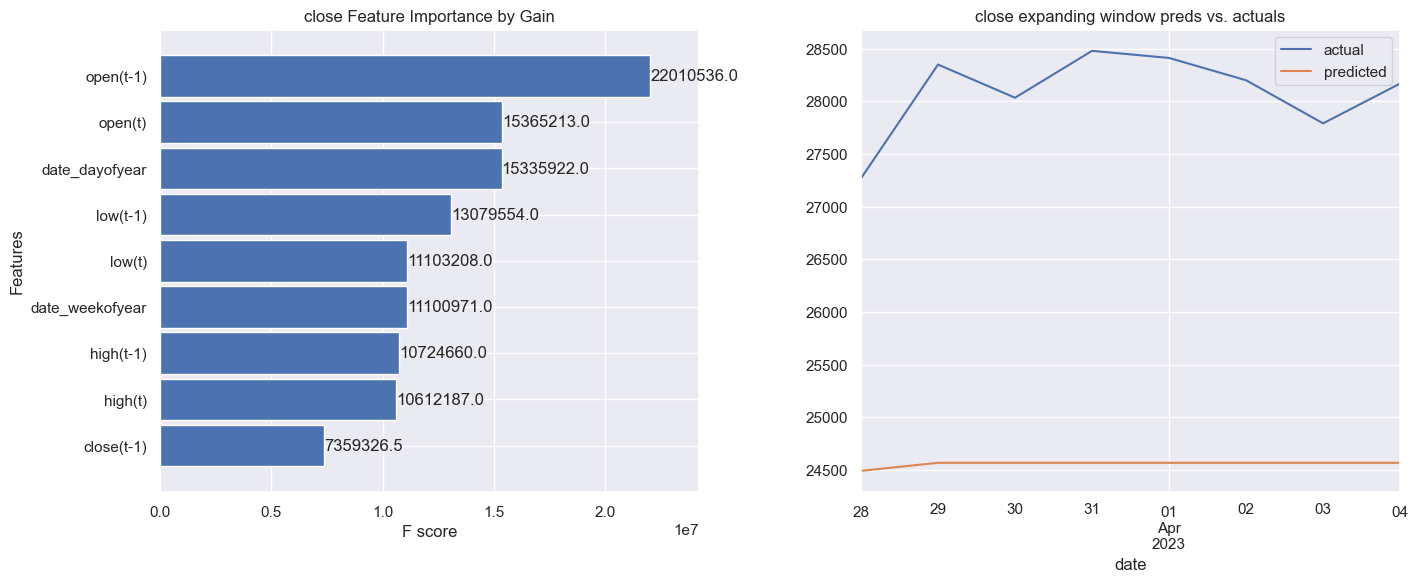

In [27]:
# Fitting model:
model.fit(traindata=train, ts_column='date', target='close', cv=3)

### Model Evaluation:

In [32]:
# Getting model results:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,2194.231518
2,VAR,3269.352685
0,Prophet,3528.903925
3,ML,3546.679149


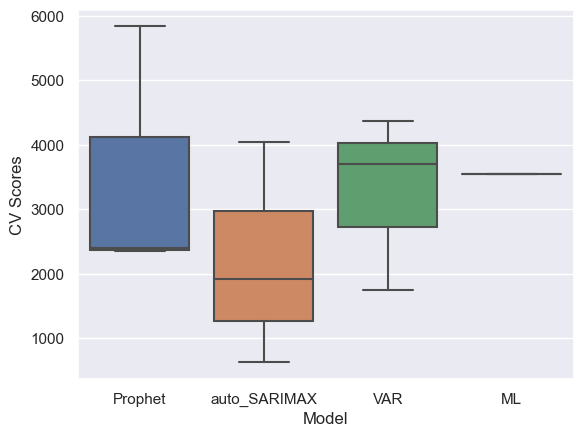

In [30]:
# Showing the first best models:
model.plot_cv_scores();

Considering the train data, the best model is AUTO_SARIMAX whose RMSE is 2194.23.

But, let's see the performance of model with test data and others evaluation metrics.

In [33]:
# Showing prediction:
predictions = model.predict(testdata=test, model='best')
print(predictions)

Predicting using test dataframe as input for auto_SARIMAX model
close               yhat      mean_se  mean_ci_lower  mean_ci_upper
2023-04-05  28204.449347   321.794386   27573.743941   28835.154754
2023-04-06  28288.244326   455.085985   27396.292187   29180.196466
2023-04-07  27828.211971   557.364226   26735.798162   28920.625780
2023-04-08  27973.243443   643.588772   26711.832630   29234.654256
2023-04-09  28205.846038   719.554121   26795.545875   29616.146201
2023-04-10  28466.971267   788.232047   26922.064843   30011.877691
2023-04-11  29378.335059   851.387918   27709.645403   31047.024716
2023-04-12  29855.171388   910.171969   28071.267108   31639.075668
2023-04-13  29500.091004   965.383157   27607.974784   31392.207223
2023-04-14  29958.632964  1017.603197   27964.167347   31953.098582
2023-04-15  30057.608802  1067.271237   27965.795615   32149.421989


In [34]:
# Checking others evaluation metrics:
y_true = test.close.to_numpy()
y_pred = predictions.yhat.to_numpy()

In [35]:
mae = mean_absolute_error(y_true, y_pred)
print("MAE: {:.2f}".format(mae))

MAE: 256.94


In [36]:
mse = mean_squared_error(y_true, y_pred, squared=True)
print("MSE: {:.2f}".format(mse))

MSE: 95751.43


In [37]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
print("RMSE: {:.2f}".format(rmse))

RMSE: 309.44


In [38]:
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: {:.2f}%".format(mape*100))

MAPE: 0.87%


### Lets see the model result of predictions in a chart:

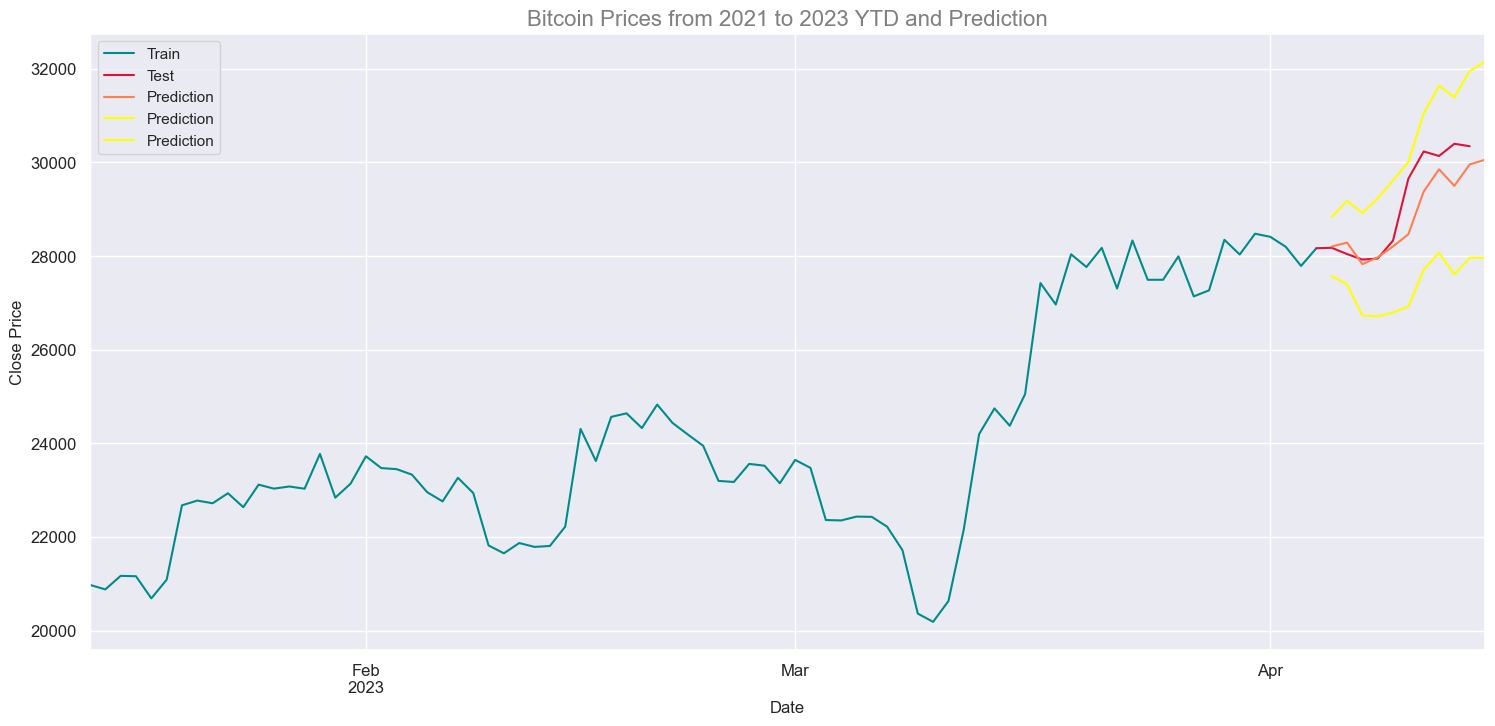

In [39]:
train_graph = train.set_index('date')
test_graph = test.set_index('date')

train_graph.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_graph.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson')
predictions.yhat.plot(figsize=(18,8), fontsize=12, label='Prediction', color='Coral')
predictions.mean_ci_upper.plot(figsize=(18,8), fontsize=12, label='Prediction', color='Yellow')
predictions.mean_ci_lower.plot(figsize=(18,8), fontsize=12, label='Prediction', color='Yellow')
plt.legend()
plt.title("Bitcoin Prices from 2021 to 2023 YTD and Prediction", fontsize=16, color='Grey')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

## The model achieved 0.87% of mean absolute percentage error (MAPE). 